In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Global Power Plant.csv")

In [3]:
data.head(50)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority,NaN


In [4]:
data.shape

(908, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [43]:
data.nunique()

country                    1
name                     862
gppd_idnr                862
capacity_mw              357
latitude                 837
longitude                828
primary_fuel               8
other_fuel1                3
source                   191
year_of_capacity_data      1
generation_gwh_2013      363
generation_gwh_2014      373
generation_gwh_2015      395
generation_gwh_2016      400
generation_gwh_2017      403
dtype: int64

In [6]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

From the Data it is very clear that in totl there are 908 rows and 25 columns.

And with that we also came to know that there are many columns, as many as 4 columns with 100% of Missing values. So, it is better to Drop these columns as we just cannot imagine that what kind of Imputation we can do on it .

So, we can DROP 'other_fuel2', 'other_fuel3', 'wepp_id' and 'estimated_generation_gwh'

In [7]:
data = data.drop(columns=['other_fuel2', 'other_fuel3', 'wepp_id','estimated_generation_gwh'], axis=1)

In [8]:
data.shape

(908, 21)

Now, our dataset has 908 rows and 21 columns

In [9]:
data.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

We still can see that there are columns with missing values. Such as 'latitude' and 'longitude'. But we cannot do anykind of imputation on that as because it is a value for some particular location. so, it is just not possible to impute the values with some random or mean or median number. So, we should drop these rows.

In [10]:
data = data.dropna(subset=['latitude','longitude'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 862 non-null    object 
 1   country_long            862 non-null    object 
 2   name                    862 non-null    object 
 3   gppd_idnr               862 non-null    object 
 4   capacity_mw             862 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            862 non-null    object 
 8   other_fuel1             194 non-null    object 
 9   commissioning_year      497 non-null    float64
 10  owner                   328 non-null    object 
 11  source                  862 non-null    object 
 12  url                     862 non-null    object 
 13  geolocation_source      862 non-null    object 
 14  year_of_capacity_data   493 non-null    fl

In [12]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We still can drop some columns because they have no bigger significance in predicting the 'Primary Fuel' and 'Capacity mw' 

And those columns are : 'country_long', commissioning_year, owner, url, generation_data_source, geolocation_source

In [13]:
data = data.drop(columns=['country_long','commissioning_year','owner','url','generation_data_source','geolocation_source'], axis=1)

In [14]:
data.shape

(862, 15)

In [23]:
data.head(10)

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,2018.0,631.777928,617.789264,843.7470,886.004428,663.774500
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,Central Electricity Authority,2018.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,Central Electricity Authority,2018.0,147.568450,157.558250,152.1952,61.421350,89.629600
7,IND,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,Central Electricity Authority,2018.0,696.738800,674.391100,721.3352,675.724400,679.594950
8,IND,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,Central Electricity Authority,2018.0,504.813250,480.594950,144.4342,402.029750,439.372100
9,IND,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,Central Electricity Authority,2018.0,2642.322000,1887.904000,1643.0460,1338.093000,1563.457000


Here 'other_fuel1' and 'year_of_capacity_data' can be replaced by Mode as because there is no other year than 2018 .

In [35]:
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0], inplace=True)
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0], inplace=True)

Similarly, we can fill the Missing Values in 'generation_gwh_2013' to 'generation_gwh_2017' with MEAN.

In [36]:
# Filling the Missing values with MEAN

data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean(), inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(), inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(), inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(), inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(), inplace=True)

In [37]:
data.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,2018.0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,2018.0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,2018.0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [71]:
data.replace({'other_fuel1': {'Oil':2,'Gas':1,'Cogeneration':0},'primary_fuel':{'Coal':7,'Hydro':6,'Solar':5,'Wind':4,'Gas':3,
                                                                               'Biomass':2,'Oil':1,'Nuclear':0}},inplace=True)

In [72]:
data['primary_fuel'].value_counts()

7    254
6    232
5    123
4    108
3     68
2     50
1     18
0      9
Name: primary_fuel, dtype: int64

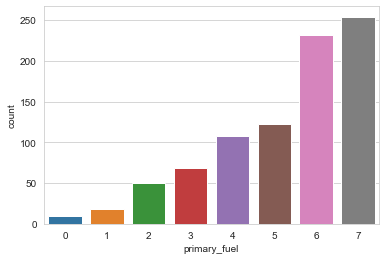

In [73]:
sns.set_style('whitegrid')
sns.countplot(x="primary_fuel", data=data);

In [74]:
data['other_fuel1'].value_counts()

2    859
1      2
0      1
Name: other_fuel1, dtype: int64

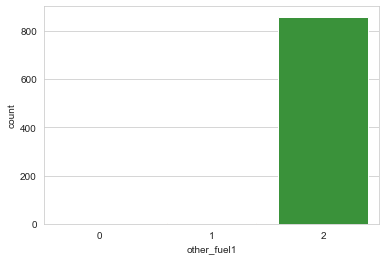

In [75]:
sns.set_style('whitegrid')
sns.countplot(x="other_fuel1", data=data);

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 907
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                862 non-null    object 
 1   name                   862 non-null    object 
 2   gppd_idnr              862 non-null    object 
 3   capacity_mw            862 non-null    float64
 4   latitude               862 non-null    float64
 5   longitude              862 non-null    float64
 6   primary_fuel           862 non-null    int64  
 7   other_fuel1            862 non-null    int64  
 8   source                 862 non-null    object 
 9   year_of_capacity_data  862 non-null    float64
 10  generation_gwh_2013    862 non-null    float64
 11  generation_gwh_2014    862 non-null    float64
 12  generation_gwh_2015    862 non-null    float64
 13  generation_gwh_2016    862 non-null    float64
 14  generation_gwh_2017    862 non-null    float64
dtypes: flo

Now, almost all the Preprocessing is done. So, we may move to the Modelling Phase.

### Modeling the Data

In [77]:
# Separating the Dataset in Features and Labels ( Defining X and Y)

X = data.drop(columns=['primary_fuel','country','name','gppd_idnr','latitude','longitude','other_fuel1',
                       'year_of_capacity_data','source'], axis=1)
Y = data['primary_fuel']

In [78]:
X

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
1,98.0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
2,39.2,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
3,135.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...
903,1600.0,2338.682337,2455.203873,0.994875,233.596650,865.400000
904,3.0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
905,25.5,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
906,80.0,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230


In [79]:
Y

0      5
1      7
2      4
3      3
4      7
      ..
903    7
904    5
905    4
906    7
907    4
Name: primary_fuel, Length: 862, dtype: int64

#### Splitting the Dataset in Train-Test_Split

In [85]:
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import accuracy_score

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=400)

##### Training the Data

#### 1.With Support Vector Machine

In [86]:
supp_vec = svm.SVC(kernel='linear')

In [87]:
# Training the SVM Model

supp_vec.fit(X_train, Y_train)

SVC(kernel='linear')

#### Model Evaluation 

In [88]:
# Accuracy Score on Training Data

X_train_pred = supp_vec.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [89]:
print(train_data_accuracy)

0.5050798258345428


In [90]:
# Accuracy Score on Test Data

X_test_pred = supp_vec.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [91]:
print(test_data_accuracy)

0.5606936416184971


#### 2.Linear Regression

In [92]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [83]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [96]:
model = lr.fit(X_train, Y_train)
pred = model.predict(X_test)

print("Accuracy on Train Data : ",(lr.score(X_train, Y_train)))
print("Accuracy on Test Data : ",(lr.score(X_test, Y_test)))

Accuracy on Train Data :  0.10720261500777795
Accuracy on Test Data :  0.08403054594541903


#### 3. Random Forest 

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc_model = rfc.fit(X_train, Y_train)
rfc_pred = rfc_model.predict(X_test)

print("Accuracy on Train Data : ",(rfc.score(X_train, Y_train)))
print("Accuracy on Test Data : ",(rfc.score(X_test, Y_test)))

Accuracy on Train Data :  0.8766328011611031
Accuracy on Test Data :  0.6127167630057804


So, we saw that the best Accuracy Score we are getting from RANDOM FOREST.

For TRAIN DATA it is 87.66%

While for TEST DATA it is 61% 